In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('Housing.csv')
df.head()
M = len(df)
M

545

In [48]:
housing = pd.DataFrame(df)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [49]:
m = len(housing)
m

545

In [50]:
housing.shape

(545, 13)

In [51]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [53]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [54]:
df_test.shape

(109, 13)

In [72]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
542,3620,2,1,1,0,1750000
496,4000,2,1,1,0,2695000
484,3040,2,1,1,0,2870000
507,3600,2,1,1,0,2590000
252,9860,3,1,1,0,4515000


In [73]:
df_Newtrain.shape

(436, 6)

In [85]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
542,3620,2,1,1,0,1750000
496,4000,2,1,1,0,2695000
484,3040,2,1,1,0,2870000
507,3600,2,1,1,0,2590000
252,9860,3,1,1,0,4515000


In [94]:
Y = df_Newtrain.values[:, 0]
print('Y =', Y[: 5])

Y = [3620 4000 3040 3600 9860]


In [95]:
from sklearn import preprocessing

In [102]:
housing = pd.read_csv("Housing.csv")
d = preprocessing.normalize(housing[num_vars])
scaled_df = pd.DataFrame(d)
scaled_df.head()

,0,1,2,3,4,5
0,0.000558,3.007518e-07,1.503759e-07,2.255639e-07,1.503759e-07,1.0
1,0.000731,3.265305e-07,3.265305e-07,3.265305e-07,2.448979e-07,1.0
2,0.000813,2.448979e-07,1.632653e-07,1.632653e-07,1.632653e-07,1.0
3,0.000614,3.274662e-07,1.637331e-07,1.637331e-07,2.455996e-07,1.0
4,0.000650,3.505696e-07,8.764240e-08,1.752848e-07,1.752848e-07,1.0


In [103]:
landArea = scaled_df.values[:, 1]
housePrice = scaled_df.values[:, 0]
m = len(housePrice)
print('landArea = ', landArea[: 5])
print('housePrice =', housePrice[: 5])
print('m = ', m)

landArea =  [3.00751833e-07 3.26530525e-07 2.44897878e-07 3.27466168e-07
 3.50569602e-07]
housePrice = [0.00055789 0.00073143 0.00081306 0.000614   0.00065031]
m =  545


Text(0.5, 1.0, 'Price of House vs Land Area')

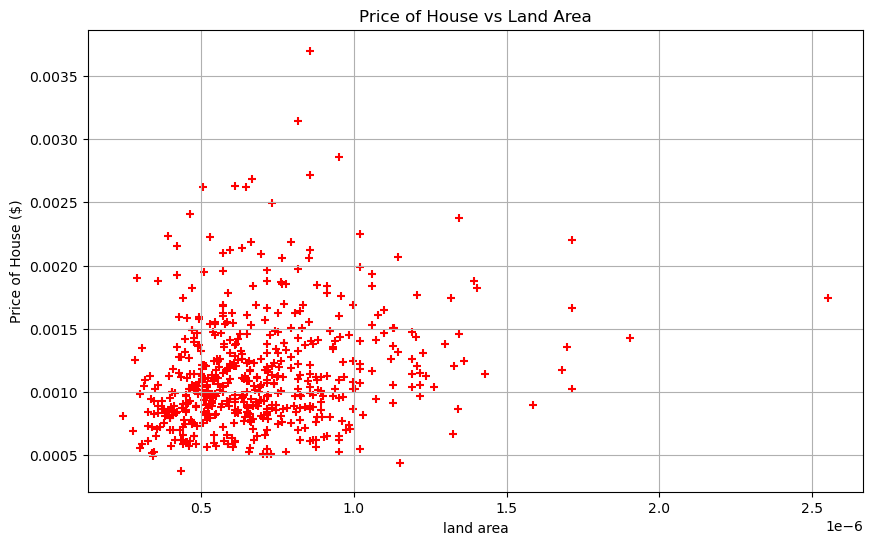

In [104]:
plt.scatter(landArea, housePrice, color='red', marker='+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('land area')
plt.ylabel('Price of House ($)')
plt.title('Price of House vs Land Area')

In [105]:
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [106]:
X_1 = landArea.reshape(m, 1)
X_1[:10]

array([[3.00751833e-07],
       [3.26530525e-07],
       [2.44897878e-07],
       [3.27466168e-07],
       [3.50569602e-07],
       [2.76497630e-07],
       [3.94088529e-07],
       [4.92610210e-07],
       [4.05268354e-07],
       [3.06122396e-07]])

In [107]:
landArea = np.hstack((X_0, X_1))
landArea[:5]

array([[1.00000000e+00, 3.00751833e-07],
       [1.00000000e+00, 3.26530525e-07],
       [1.00000000e+00, 2.44897878e-07],
       [1.00000000e+00, 3.27466168e-07],
       [1.00000000e+00, 3.50569602e-07]])

In [108]:
theta_landArea = np.zeros(2)
theta_landArea

array([0., 0.])

In [24]:
def compute_housingCost(X, Y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    
    return J

In [109]:
cost_landArea = compute_housingCost(landArea, housePrice, theta_landArea)
print('The cost for given values of theta_0 and theta_1 (for the land area) =', cost_landArea)

The cost for given values of theta_0 and theta_1 (for the land area) = 7.467945582978643e-07


In [38]:
def gradient_descent(X, Y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_housingCost(X, Y, theta)
        
    return theta, cost_history

In [110]:
theta_landArea = [0., 0.]
iterations = 1500
alpha = 0.01

In [137]:
theta_landArea, cost_history_landArea = gradient_descent(landArea, housePrice, theta_landArea, alpha, iterations)
print('Final value of theta for land area =', theta_landArea)
print('cost_history for land area =', cost_history_landArea)

Final value of theta for land area = [1.14091017e-03 1.59608459e-09]
cost_history for land area = [9.59565454e-08 9.59565454e-08 9.59565454e-08 ... 9.59565454e-08
 9.59565454e-08 9.59565454e-08]


In [142]:
theta_landArea.reshape(-1, 1)
unscaledTheta_landArea = scaler.inverse_transform(theta_landArea)

ValueError: Expected 2D array, got 1D array instead:
array=[1.14091017e-03 1.59608459e-09].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
housePrice = df.values[:, 0]
landArea = df.values[:, 1]
m = len(housePrice)
print('landArea = ', landArea[: 5])
print('housePrice = ', housePrice[: 5])
print('m = ', m)

landArea =  [7420 8960 9960 7500 7420]
housePrice =  [13300000 12250000 12250000 12215000 11410000]
m =  545


Text(0.5, 1.0, 'Price of House vs Land Area')

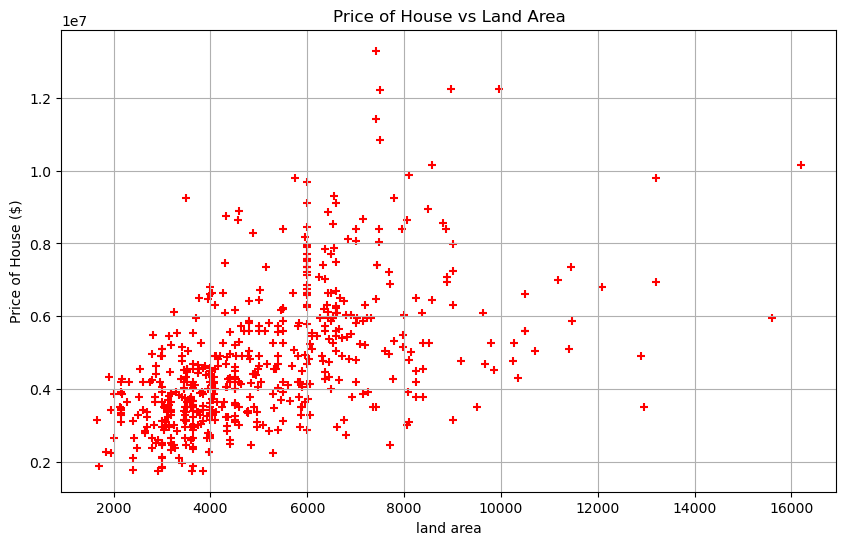

In [16]:
plt.scatter(landArea, housePrice, color='red', marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('land area')
plt.ylabel('Price of House ($)')
plt.title('Price of House vs Land Area')

In [17]:
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [18]:
X_1 = landArea.reshape(m, 1)
X_1[:10]

array([[7420],
       [8960],
       [9960],
       [7500],
       [7420],
       [7500],
       [8580],
       [16200],
       [8100],
       [5750]], dtype=object)

In [19]:
landArea = np.hstack((X_0, X_1))
landArea[:5]

array([[1.0, 7420],
       [1.0, 8960],
       [1.0, 9960],
       [1.0, 7500],
       [1.0, 7420]], dtype=object)

In [20]:
theta_LandArea = np.zeros(2)
theta_LandArea

array([0., 0.])

In [25]:
housingCost = compute_housingCost(landArea, housePrice, theta_LandArea)
print('The cost for given values of theta_0 and theta_1 =', housingCost)

The cost for given values of theta_0 and theta_1 = 13106916364659.268


In [45]:
theta_housingCost = [0., 0.]
iterations = 1500;
alpha = 0.000000001;

In [46]:
theta_housingCost, cost_history = gradient_descent(landArea, housingCost, theta_housingCost, alpha, iterations)
print('Final value of theta = ', theta_housingCost)
print('cost_history = ', cost_history)

Final value of theta =  [3315987.827648845 2161702687.713938]
cost_history =  [8.14094964e+25 7.71991838e+25 7.32477323e+25 ... 1.29298004e+25
 1.29298004e+25 1.29298004e+25]
